In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dataUtils import DataUtils as utils
from model_utils import ModelUtils as mutls

C:\Users\Yang\.conda\envs\test_speedcom\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
from keras import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU, Conv1D, Activation

Using TensorFlow backend.


In [3]:
df=pd.read_csv('temp_cfprint.tsv', sep='\t')

In [4]:
df.head()

,#,Name,name_smiles,Wavelength,Epsilon,Quantum Yield,cfp
0,1,Benzene,C1=CC=CC=C1,254.75,210,0.053,"[224, 255, 255, 255, 0, 8, 0, 0, 3, 0, 0, 0, 2..."
1,2,Toluene,CC1=CC=CC=C1,261.75,2860,0.170,"[224, 255, 255, 255, 0, 8, 0, 0, 11, 0, 0, 0, ..."
2,3,o-Xylene,CC1=CC=CC=C1C,263.00,254,0.170,"[224, 255, 255, 255, 0, 8, 0, 0, 10, 0, 0, 0, ..."
3,4,m-Xylene,CC1=CC(=CC=C1)C,265.00,284,0.130,"[224, 255, 255, 255, 0, 8, 0, 0, 12, 0, 0, 0, ..."
4,5,p-Xylene,CC1=CC=C(C=C1)C,275.00,770,0.220,"[224, 255, 255, 255, 0, 8, 0, 0, 8, 0, 0, 0, 1..."


In [40]:
X_fp=utils.finger_print_clean(df=df,colname_string_array='cfp')

fingerprint column shape is (267, 137)


In [41]:
X_fp.shape

(267, 137)

In [42]:
Y = df.values[:,3]

### First model original Y

In [43]:
d_cat = mutls.combine_columns((X_fp, Y))

In [44]:
X, y = d_cat[:,0:-1], d_cat[:,-1]

In [45]:
y

array([254.75, 261.75, 263.0, 265.0, 275.0, 265.0, 278.0, 271.0, 271.0,
       270.75, 220.0, 222.0, 242.0, 227.0, 241.0, 288.0, 251.0, 279.0,
       265.0, 228.0, 258.0, 248.0, 236.0, 274.0, 277.0, 227.0, 222.0,
       218.0, 310.25, 291.0, 240.0, 251.0, 263.0, 245.0, 302.0, 252.0,
       283.0, 225.0, 316.0, 230.0, 442.0, 247.5, 276.25, 294.75, 312.0,
       251.0, 206.0, 209.0, 212.0, 245.0, 223.0, 278.0, 275.0, 356.25,
       475.0, 578.0, 252.0, 241.0, 258.0, 372.5, 270.25, 303.0, 228.0,
       239.0, 245.0, 218.0, 227.0, 235.0, 278.75, 276.0, 293.75, 326.0,
       330.0, 353.25, 432.25, 425.0, 372.0, 451.0, 251.0, 276.0, 227.0,
       257.0, 265.0, 270.0, 215.0, 281.0, 238.0, 204.0, 219.0, 245.0,
       217.0, 253.0, 231.75, 206.0, 278.0, 502.0, 413.0, 286.0, 336.0,
       460.5, 219.0, 413.0, 247.0, 349.0, 262.0, 257.5, 274.25, 211.0,
       278.0, 261.0, 243.0, 266.75, 263.75, 258.25, 228.0, 259.0, 212.0,
       263.0, 265.0, 206.0, 248.0, 281.0, 239.75, 225.0, 288.0, 211.0,
  

In [46]:
X_train, X_test, y_train, y_test = utils.splitData(X, y, ratio=0.20)


In [47]:
unique_int_counts = len(np.unique(X_train))

In [48]:
np.unique(X_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 84, 85, 86, 88, 89, 90,
       92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 104, 105, 106, 108, 109,
       110, 112, 113, 114, 116, 117, 118, 120, 121, 122, 124, 125, 126,
       128, 129, 130, 132, 133, 134, 136, 137, 138, 140, 141, 142, 144,
       145, 146, 148, 149, 150, 152, 153, 154, 156, 157, 158, 160, 161,
       162, 164, 165, 166, 168, 169, 170, 172, 173, 174, 176, 177, 178,
       180, 181, 182, 184, 185, 186, 188, 189, 190, 192, 193, 194, 196,
       197, 198, 200, 201, 202, 204, 205, 206, 208, 209, 210, 212, 213,
       214, 216, 217, 218, 220, 221, 222, 224, 225, 226, 228, 229, 230,
       232, 233, 234, 236, 237, 238, 240, 241, 2

In [49]:
unique_int_counts

212

In [50]:
X_train.shape

(213, 137)

In [56]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout, Flatten

In [57]:
hidden_size = 50
model = Sequential()
model.add(Embedding(256, hidden_size, input_length= X.shape[1]))
model.add(LSTM(hidden_size, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(hidden_size, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(hidden_size, return_sequences=True))
model.add(Dropout(0.4))
model.add(Dense(hidden_size, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='linear'))

In [58]:
model.compile(loss='mean_absolute_error', optimizer='Adam', metrics=['mean_absolute_error'])
model.summary() ##use mean_squared_error loss

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 137, 50)           12800     
_________________________________________________________________
lstm_10 (LSTM)               (None, 137, 50)           20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 137, 50)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 137, 50)           20200     
_________________________________________________________________
dropout_11 (Dropout)         (None, 137, 50)           0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 137, 50)           20200     
_________________________________________________________________
dropout_12 (Dropout)         (None, 137, 50)           0         
__________

In [59]:
model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=100)

Train on 213 samples, validate on 54 samples
Epoch 1/100
213/213 [==============================] - 8s 39ms/step - loss: 371.4458 - mean_absolute_error: 371.4458 - val_loss: 345.9026 - val_mean_absolute_error: 345.9026
Epoch 2/100
213/213 [==============================] - 2s 11ms/step - loss: 364.7319 - mean_absolute_error: 364.7319 - val_loss: 324.5455 - val_mean_absolute_error: 324.5455
Epoch 3/100
213/213 [==============================] - 2s 11ms/step - loss: 319.5907 - mean_absolute_error: 319.5907 - val_loss: 254.3188 - val_mean_absolute_error: 254.3188
Epoch 4/100
213/213 [==============================] - 2s 11ms/step - loss: 224.9882 - mean_absolute_error: 224.9882 - val_loss: 122.8426 - val_mean_absolute_error: 122.8426
Epoch 5/100
213/213 [==============================] - 2s 11ms/step - loss: 128.0332 - mean_absolute_error: 128.0332 - val_loss: 117.9687 - val_mean_absolute_error: 117.9687
Epoch 6/100
213/213 [==============================] - 2s 11ms/step - loss: 135.6477 

213/213 [==============================] - 3s 12ms/step - loss: 121.3199 - mean_absolute_error: 121.3199 - val_loss: 98.6252 - val_mean_absolute_error: 98.6252
Epoch 49/100
213/213 [==============================] - 3s 12ms/step - loss: 121.9260 - mean_absolute_error: 121.9260 - val_loss: 98.8133 - val_mean_absolute_error: 98.8133
Epoch 50/100
213/213 [==============================] - 3s 12ms/step - loss: 121.4556 - mean_absolute_error: 121.4556 - val_loss: 97.7175 - val_mean_absolute_error: 97.7175
Epoch 51/100
213/213 [==============================] - 3s 12ms/step - loss: 122.1086 - mean_absolute_error: 122.1086 - val_loss: 98.0477 - val_mean_absolute_error: 98.0477
Epoch 52/100
213/213 [==============================] - 3s 12ms/step - loss: 122.2317 - mean_absolute_error: 122.2317 - val_loss: 99.6527 - val_mean_absolute_error: 99.6527
Epoch 53/100
213/213 [==============================] - 3s 12ms/step - loss: 122.2493 - mean_absolute_error: 122.2493 - val_loss: 99.6112 - val_mean

213/213 [==============================] - 3s 12ms/step - loss: 121.3471 - mean_absolute_error: 121.3471 - val_loss: 98.1443 - val_mean_absolute_error: 98.1443
Epoch 96/100
213/213 [==============================] - 3s 12ms/step - loss: 121.7032 - mean_absolute_error: 121.7032 - val_loss: 97.7915 - val_mean_absolute_error: 97.7915
Epoch 97/100
213/213 [==============================] - 3s 12ms/step - loss: 121.7464 - mean_absolute_error: 121.7464 - val_loss: 99.2007 - val_mean_absolute_error: 99.2007
Epoch 98/100
213/213 [==============================] - 3s 12ms/step - loss: 121.5803 - mean_absolute_error: 121.5803 - val_loss: 98.9213 - val_mean_absolute_error: 98.9213
Epoch 99/100
213/213 [==============================] - 3s 12ms/step - loss: 121.5795 - mean_absolute_error: 121.5795 - val_loss: 97.7123 - val_mean_absolute_error: 97.7123
Epoch 100/100
213/213 [==============================] - 3s 12ms/step - loss: 121.5818 - mean_absolute_error: 121.5818 - val_loss: 97.7098 - val_mea

#### First model2, change loss function

In [53]:
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mean_absolute_error'])
model.summary() ##use mean_squared_error loss

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 137, 50)           12800     
_________________________________________________________________
lstm_7 (LSTM)                (None, 137, 50)           20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 137, 50)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 137, 50)           20200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 137, 50)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 137, 50)           20200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 137, 50)           0         
__________

In [54]:
model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=100)

Train on 213 samples, validate on 54 samples
Epoch 1/100
213/213 [==============================] - 8s 36ms/step - loss: 160529.8939 - mean_absolute_error: 371.5190 - val_loss: 135713.5061 - val_mean_absolute_error: 346.2331
Epoch 2/100
213/213 [==============================] - 2s 11ms/step - loss: 156974.6131 - mean_absolute_error: 366.6921 - val_loss: 123406.2170 - val_mean_absolute_error: 327.8209
Epoch 3/100
213/213 [==============================] - 2s 11ms/step - loss: 122958.3816 - mean_absolute_error: 317.8396 - val_loss: 75039.2554 - val_mean_absolute_error: 243.2930
Epoch 4/100
213/213 [==============================] - 2s 11ms/step - loss: 68738.3347 - mean_absolute_error: 210.6747 - val_loss: 25942.1020 - val_mean_absolute_error: 108.0121
Epoch 5/100
213/213 [==============================] - 2s 11ms/step - loss: 26648.6717 - mean_absolute_error: 128.1343 - val_loss: 21565.3057 - val_mean_absolute_error: 132.3983
Epoch 6/100
213/213 [==============================] - 2s 11

213/213 [==============================] - 2s 11ms/step - loss: 22338.8572 - mean_absolute_error: 129.0616 - val_loss: 15963.2139 - val_mean_absolute_error: 111.9521
Epoch 47/100
213/213 [==============================] - 2s 10ms/step - loss: 22764.1123 - mean_absolute_error: 127.8822 - val_loss: 15935.7211 - val_mean_absolute_error: 111.6240
Epoch 48/100
213/213 [==============================] - 2s 10ms/step - loss: 22610.8333 - mean_absolute_error: 128.9553 - val_loss: 16072.1042 - val_mean_absolute_error: 113.0630
Epoch 49/100
213/213 [==============================] - 2s 10ms/step - loss: 22427.1392 - mean_absolute_error: 129.0361 - val_loss: 16306.1367 - val_mean_absolute_error: 114.9209
Epoch 50/100
213/213 [==============================] - 2s 10ms/step - loss: 22540.3139 - mean_absolute_error: 130.4977 - val_loss: 16292.5463 - val_mean_absolute_error: 114.8278
Epoch 51/100
213/213 [==============================] - 2s 10ms/step - loss: 22646.4158 - mean_absolute_error: 129.174

Epoch 92/100
213/213 [==============================] - 2s 11ms/step - loss: 22574.1164 - mean_absolute_error: 129.7047 - val_loss: 16367.2105 - val_mean_absolute_error: 115.3236
Epoch 93/100
213/213 [==============================] - 2s 11ms/step - loss: 22652.0807 - mean_absolute_error: 131.6195 - val_loss: 16318.0324 - val_mean_absolute_error: 115.0015
Epoch 94/100
213/213 [==============================] - 2s 11ms/step - loss: 23180.1236 - mean_absolute_error: 129.5049 - val_loss: 15831.2598 - val_mean_absolute_error: 109.3134
Epoch 95/100
213/213 [==============================] - 2s 11ms/step - loss: 22522.5416 - mean_absolute_error: 128.2661 - val_loss: 16362.1314 - val_mean_absolute_error: 115.2911
Epoch 96/100
213/213 [==============================] - 2s 11ms/step - loss: 22784.4535 - mean_absolute_error: 132.2548 - val_loss: 16300.9894 - val_mean_absolute_error: 114.8861
Epoch 97/100
213/213 [==============================] - 2s 11ms/step - loss: 22589.7885 - mean_absolute_e

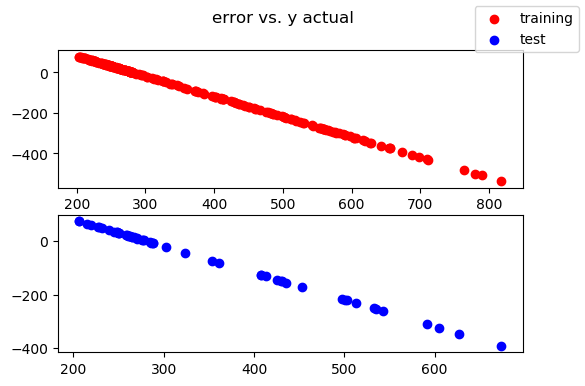

In [60]:
mutls.plot_model(X_train, X_test, y_train, y_test, model)

### Second model, category model

In [27]:
Y_category = mutls.get_y_category(y_actual=Y, min_edge=200, bin_width=20)

In [28]:
cls_counts = mutls.get_class_count(Y_category)

In [29]:

print(cls_counts)

{0.0: 18, 1.0: 23, 2.0: 40, 3.0: 44, 4.0: 14, 5.0: 7, 6.0: 8, 7.0: 4, 8.0: 6, 9.0: 3, 10.0: 12, 11.0: 10, 12.0: 7, 13.0: 4, 14.0: 7, 15.0: 10, 16.0: 5, 17.0: 10, 18.0: 6, 19.0: 6, 20.0: 6, 21.0: 3, 22.0: 4, 23.0: 2, 24.0: 2, 25.0: 2, 28.0: 1, 29.0: 2, 30.0: 1}


In [30]:
X_fp.shape

(267, 137)

In [31]:
d_cat = mutls.combine_columns((X_fp, Y_category))

In [32]:
subsampled=mutls.subsampling(d_cat,-1,15,cls_counts)

In [33]:
subsampled

array([[224, 255, 255, ..., 0, 0, 3.0],
       [224, 255, 255, ..., 0, 0, 3.0],
       [224, 255, 255, ..., 0, 0, 1.0],
       ...,
       [224, 255, 255, ..., 0, 0, 10.0],
       [224, 255, 255, ..., 0, 0, 10.0],
       [224, 255, 255, ..., 0, 0, 29.0]], dtype=object)

In [34]:
X, y = subsampled[:,0:-1], subsampled[:,-1]
y_onehot = mutls.onehot_encode_y(y=y, num_class=31)
X_train, X_test, y_train, y_test = utils.splitData(X, y_onehot, ratio=0.10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(177, 137)
(20, 137)
(177, 31)
(20, 31)


### 2nd fingerprint model RNN LSTM with category Y

In [35]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

rnn1_size = 224
rnn2_size = 384
dropout_rate = 0.2
loss = 'categorical_crossentropy'
metrics = ['accuracy']
num_classes = 31
optimizer = 'adam' #use adam optimizer

model_1 = Sequential()
model_1.add(LSTM(rnn1_size, return_sequences=True, input_shape=(137,1))) #137
model_1.add(Dropout(0.3))
model_1.add(LSTM(rnn2_size))
model_1.add(Dropout(0.3))
model_1.add(Dense(num_classes, activation='softmax'))
model_1.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 137, 224)          202496    
_________________________________________________________________
dropout_5 (Dropout)          (None, 137, 224)          0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 384)               935424    
_________________________________________________________________
dropout_6 (Dropout)          (None, 384)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 31)                11935     
Total params: 1,149,855
Trainable params: 1,149,855
Non-trainable params: 0
_________________________________________________________________


In [36]:
batch_size = 16
epochs = 100

model_1.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=[X_test, y_test])

Train on 177 samples, validate on 20 samples
Epoch 1/100
177/177 [==============================] - 11s 64ms/step - loss: 3.3985 - acc: 0.0678 - val_loss: 3.6953 - val_acc: 0.0000e+00
Epoch 2/100
177/177 [==============================] - 9s 50ms/step - loss: 3.2996 - acc: 0.0734 - val_loss: 3.3716 - val_acc: 0.0500
Epoch 3/100
177/177 [==============================] - 11s 61ms/step - loss: 3.2748 - acc: 0.0508 - val_loss: 3.4042 - val_acc: 0.1000
Epoch 4/100
177/177 [==============================] - 12s 68ms/step - loss: 3.1691 - acc: 0.0734 - val_loss: 4.6653 - val_acc: 0.0000e+00
Epoch 5/100
177/177 [==============================] - 12s 69ms/step - loss: 3.3672 - acc: 0.0791 - val_loss: 3.3349 - val_acc: 0.1000
Epoch 6/100
177/177 [==============================] - 15s 82ms/step - loss: 3.2352 - acc: 0.0678 - val_loss: 3.3266 - val_acc: 0.1000
Epoch 7/100
177/177 [==============================] - 11s 62ms/step - loss: 3.2201 - acc: 0.0565 - val_loss: 3.4638 - val_acc: 0.1000
Epo

Epoch 61/100
177/177 [==============================] - 12s 66ms/step - loss: 2.5051 - acc: 0.2034 - val_loss: 3.5730 - val_acc: 0.1000
Epoch 62/100
177/177 [==============================] - 12s 67ms/step - loss: 2.5998 - acc: 0.2373 - val_loss: 3.6315 - val_acc: 0.1000
Epoch 63/100
177/177 [==============================] - 11s 62ms/step - loss: 2.5427 - acc: 0.1695 - val_loss: 3.6185 - val_acc: 0.1500
Epoch 64/100
177/177 [==============================] - 11s 62ms/step - loss: 2.5352 - acc: 0.1582 - val_loss: 3.6107 - val_acc: 0.2000
Epoch 65/100
177/177 [==============================] - 11s 64ms/step - loss: 2.4657 - acc: 0.1864 - val_loss: 3.5976 - val_acc: 0.1500
Epoch 66/100
177/177 [==============================] - 11s 63ms/step - loss: 2.4651 - acc: 0.1638 - val_loss: 3.5977 - val_acc: 0.2000
Epoch 67/100
177/177 [==============================] - 12s 67ms/step - loss: 2.5105 - acc: 0.1695 - val_loss: 3.5965 - val_acc: 0.1500
Epoch 68/100
177/177 [==========================

Training acc 0.25, testing accuracy 0.05 (max 0.15)